In [1]:
import numpy as np
import pymc3 as pm
import arviz as az
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mixed_model = az.from_netcdf('trace/pk_mixed_model.NC')
reg = az.from_netcdf('trace/pk_regression.NC')
df = pd.read_csv('data/train.csv', index_col = 0)
df.index = df.index.rename('subject')
df=df.reset_index()

In [3]:
draws = reg.posterior.conc.stack(z=['chain','draw','conc_dim_0']).to_dataframe()

reg_model_summary = draws.groupby('conc_dim_0').agg([('reg_mean',np.mean), 
                                                     ('reg_lower', lambda x: np.quantile(x,0.025)),
                                                     ('reg_upper', lambda x: np.quantile(x, 0.975))])

reg_model_summary.columns = reg_model_summary.columns.droplevel()

In [4]:
draws = mixed_model.posterior.conc.stack(z=['chain','draw','conc_dim_0']).to_dataframe()


mixed_model_summary = draws.groupby('conc_dim_0').agg([('mixed_mean',np.mean), 
                                                     ('mixed_lower', lambda x: np.quantile(x,0.025)),
                                                     ('mixed_upper', lambda x: np.quantile(x, 0.975))])

mixed_model_summary.columns = mixed_model_summary.columns.droplevel()

In [5]:
df = df.join(reg_model_summary).join(mixed_model_summary)

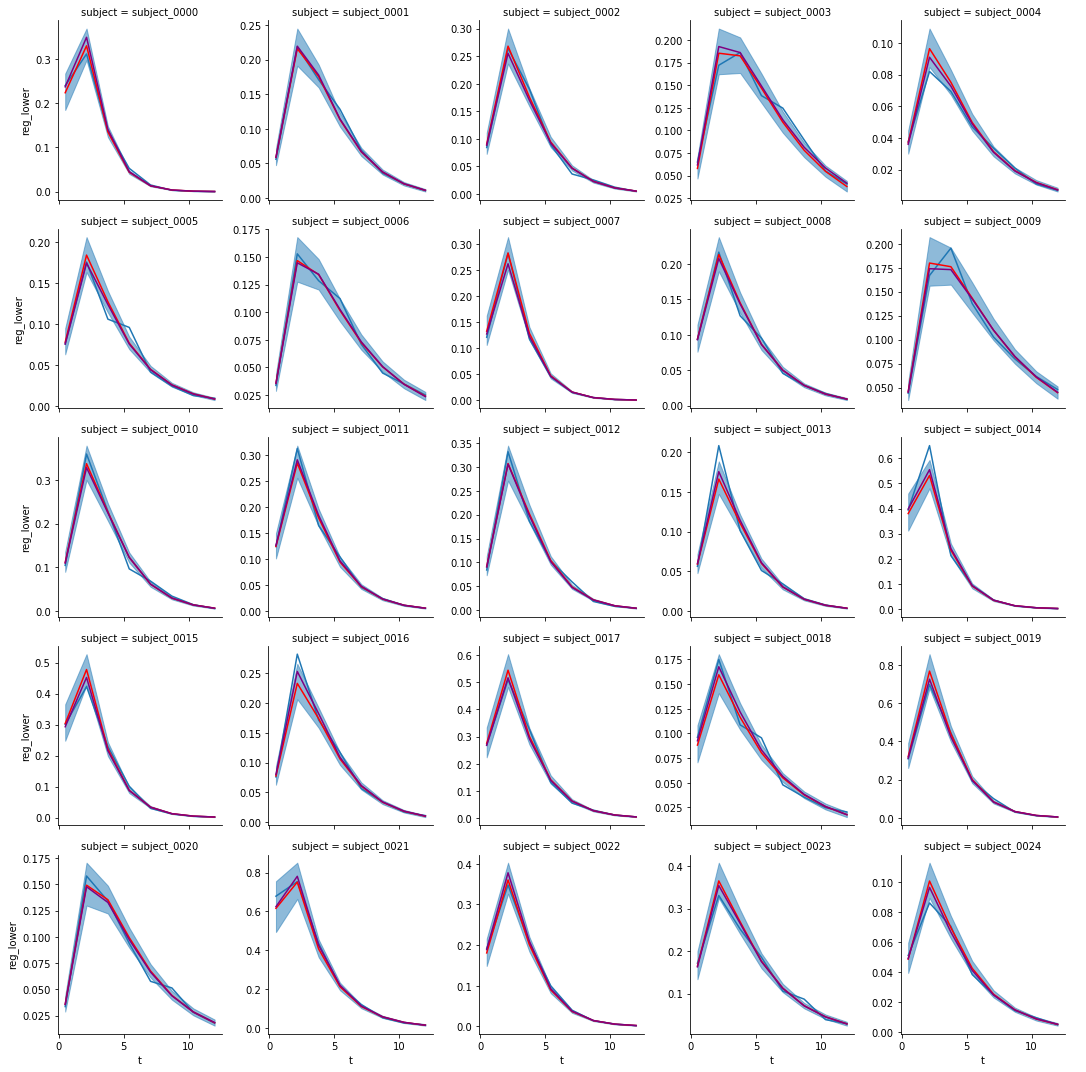

In [6]:
g = sns.FacetGrid(data = df, col='subject', col_wrap=5, sharey = False)

g.map_dataframe(sns.lineplot, 't','y_obs', color = 'C0')
g.map_dataframe(sns.lineplot, 't','reg_mean', color= 'r')
g.map_dataframe(sns.lineplot, 't','mixed_mean', color= 'purple')
g.map_dataframe(plt.fill_between, 't', 'reg_lower','reg_upper', alpha = 0.5)
g.add_legend()

In [14]:
reg.posterior_predictive

<xarray.Dataset>
Dimensions:     (Yobs_dim_0: 200, chain: 12, draw: 1000)
Coordinates:
  * chain       (chain) int64 0 1 2 3 4 5 6 7 8 9 10 11
  * draw        (draw) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
  * Yobs_dim_0  (Yobs_dim_0) int64 0 1 2 3 4 5 6 ... 193 194 195 196 197 198 199
Data variables:
    Yobs        (chain, draw, Yobs_dim_0) float64 ...
Attributes:
    created_at:                 2019-12-17T16:47:11.782903
    inference_library:          pymc3
    inference_library_version:  3.8